In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt

In [4]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 15,6

In [6]:
import os

In [20]:
from src import data, viz

In [34]:
df = pd.read_csv(
    os.path.join(data.data_root, 'external', 'RKI', 'Nowcasting_Zahlen.csv'),
    parse_dates=[0]
)
df

,Datum des Erkrankungsbeginns,Punktschätzer der Anzahl Neuerkrankungen (ohne Glättung),Untere Grenze des 95%-Prädiktionsintervalls der Anzahl Neuerkrankungen (ohne Glä,Obere Grenze des 95%-Prädiktionsintervalls der Anzahl Neuerkrankungen (ohne Glät,Punktschätzer der Anzahl Neuerkrankungen,Untere Grenze des 95%-Prädiktionsintervalls der Anzahl Neuerkrankungen,Obere Grenze des 95%-Prädiktionsintervalls der Anzahl Neuerkrankungen,Punktschätzer der Reproduktionszahl R,Untere Grenze des 95%-Prädiktionsintervalls der Reproduktionszahl R,Obere Grenze des 95%-Prädiktionsintervalls der Reproduktionszahl R,Punktschätzer des 7-Tage-R Wertes,Untere Grenze des 95%-Prädiktionsintervalls des 7-Tage-R Wertes,Obere Grenze des 95%-Prädiktionsintervalls des 7-Tage-R Wertes
0,2020-03-02,312,296,330,229,214,244,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-03-03,332,316,348,266,251,282,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-03-04,458,440,478,333,317,351,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-03-05,503,482,528,401,383,421,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-03-06,765,741,792,514,495,536,2.25,2.16,2.36,2.32,2.27,2.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,2020-05-08,677,537,800,763,653,875,0.94,0.87,1.05,0.91,0.87,0.96
68,2020-05-09,625,514,793,709,593,841,0.86,0.79,0.95,0.89,0.84,0.94
69,2020-05-10,563,421,702,650,526,788,0.78,0.70,0.87,0.88,0.82,0.96
70,2020-05-11,729,466,987,648,484,821,0.79,0.68,0.92,0.89,0.81,0.97


In [35]:
cols_en = [
    'date_of_disease_onset',
    'number_of_new_cases_point_estimate_without_smoothing',
    'number_of_new_cases_lower_CI_95_without_smoothing',
    'number_of_new_cases_upper_CI_95_without_smoothing',
    'number_of_new_cases_point_estimate',
    'number_of_new_cases_lower_CI_95',
    'number_of_new_cases_upper_CI_95',
    'reproduction_number_R_point_estimate',
    'reproduction_number_R_lower_CI_95',
    'reproduction_number_R_upper_CI_95',
    'R_7_day_point_estimate',
    'R_7_day_lower_CI_95',
    'R_7_day_upper_CI_95',
]
df = df.rename(columns=dict(zip(df.columns,cols_en))).set_index('date_of_disease_onset')
df

,number_of_new_cases_point_estimate_without_smoothing,number_of_new_cases_lower_CI_95_without_smoothing,number_of_new_cases_upper_CI_95_without_smoothing,number_of_new_cases_point_estimate,number_of_new_cases_lower_CI_95,number_of_new_cases_upper_CI_95,reproduction_number_R_point_estimate,reproduction_number_R_lower_CI_95,reproduction_number_R_upper_CI_95,R_7_day_point_estimate,R_7_day_lower_CI_95,R_7_day_upper_CI_95
date_of_disease_onset,,,,,,,,,,,,
2020-03-02,312,296,330,229,214,244,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-03,332,316,348,266,251,282,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-04,458,440,478,333,317,351,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-05,503,482,528,401,383,421,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-06,765,741,792,514,495,536,2.25,2.16,2.36,2.32,2.27,2.38
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-08,677,537,800,763,653,875,0.94,0.87,1.05,0.91,0.87,0.96
2020-05-09,625,514,793,709,593,841,0.86,0.79,0.95,0.89,0.84,0.94
2020-05-10,563,421,702,650,526,788,0.78,0.70,0.87,0.88,0.82,0.96


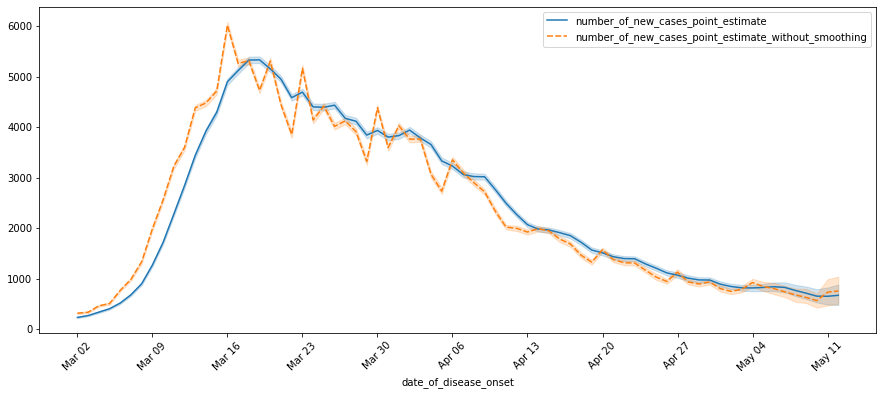

In [33]:
fig, ax = plt.subplots()

sns.lineplot(
    data=df[['number_of_new_cases_point_estimate','number_of_new_cases_point_estimate_without_smoothing']],
    ax=ax
)

ax.fill_between(
    df.index.values,
    df.number_of_new_cases_lower_CI_95, 
    df.number_of_new_cases_upper_CI_95,
    color=sns.color_palette()[0],
    alpha=0.2
)

ax.fill_between(
    df.index.values,
    df.number_of_new_cases_lower_CI_95_without_smoothing, 
    df.number_of_new_cases_upper_CI_95_without_smoothing,
    color=sns.color_palette()[1],
    alpha=0.2
)



viz.format_xaxis_dates(ax)
ax.xaxis.set_tick_params(rotation=45)

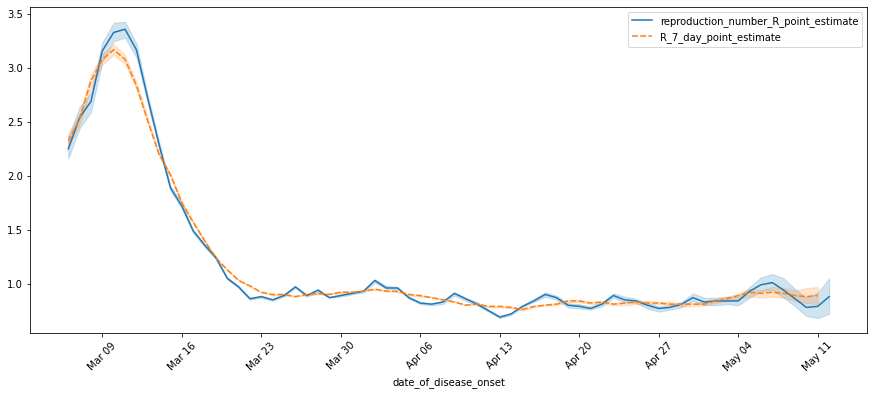

In [38]:
fig, ax = plt.subplots()

sns.lineplot(
    data=df[['reproduction_number_R_point_estimate','R_7_day_point_estimate']],
    ax=ax
)

ax.fill_between(
    df.index.values,
    df.reproduction_number_R_lower_CI_95, 
    df.reproduction_number_R_upper_CI_95,
    color=sns.color_palette()[0],
    alpha=0.2
)

ax.fill_between(
    df.index.values,
    df.R_7_day_lower_CI_95,
    df.R_7_day_upper_CI_95,
    color=sns.color_palette()[1],
    alpha=0.2
)



viz.format_xaxis_dates(ax)
ax.xaxis.set_tick_params(rotation=45)